# `astroplan` demo: boolean combinations of constraints

for @astrofrog by @bmorris3!

Construct an observer, targets, times:

In [2]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from astropy.time import Time
import astropy.units as u

from astroplan import Observer, FixedTarget

# Observe from Keck
obs = Observer.at_site("Keck")

# Observe these three stars
name_list = ['vega', 'rigel', 'sirius']
target_list = [FixedTarget.from_name(name) for name in name_list]

# Check constraints once an hour for one day
times = Time.now() + u.Quantity(range(24), unit=u.hour)

Make a list of constraints to compute:

In [10]:
from astroplan import (AltitudeConstraint, MoonSeparationConstraint, 
                       AtNightConstraint)
from astropy.time import Time

# Make an instance of each constraint
constraint1 = AltitudeConstraint(min=25*u.deg)
constraint2 = AtNightConstraint.twilight_astronomical()
constraint3 = MoonSeparationConstraint(min=30*u.deg)

# Apply each constraint, store each result separately
c1, c2, c3 = [c(obs, target_list, times) 
              for c in [constraint1, constraint2, constraint3]]

# Show one result
print("AltitudeConstraint result: (col=time, row=target)\n{0}".format(c1))

AltitudeConstraint result: (col=time, row=target)
[[ True  True  True  True  True  True  True False False False False False
  False False False False False False False False False  True  True  True]
 [False False False False False False False False False  True  True  True
   True  True  True  True  True False False False False False False False]
 [False False False False False False False False False False False  True
   True  True  True  True  True  True False False False False False False]]


Now combine those constraint results with non-trivial boolean logic:

In [11]:
combination = (c1 & c2) | c3
combination

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]], dtype=bool)

Simple visualization of this combined constraint result, white pixels = constraints are met, black pixels = constraints are not met. 

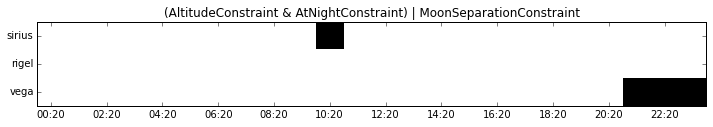

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 3))
ax.imshow(combination, interpolation='nearest', origin='lower', cmap=plt.cm.binary_r)
ax.set_yticks(range(3))
ax.set_yticklabels([t.name for t in target_list])
time_inds = range(24)[::2]
ax.set_xticks(time_inds)
ax.set_xticklabels([t.datetime.strftime("%H:%M") for t in times[time_inds]])
ax.set_title("(AltitudeConstraint & AtNightConstraint) | MoonSeparationConstraint");